### Deliverable 1: Preprocessing the Data for a Neural Network

In [30]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [31]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(columns=["EIN"], axis=0)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [32]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
print(application_df.nunique())

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64


In [33]:
cv_list = []
for c in application_df.columns:
    if isinstance(application_df[c][0], str):
        cv_list.append(c)
cv_list

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [34]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [35]:
name_counts[:50]

PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

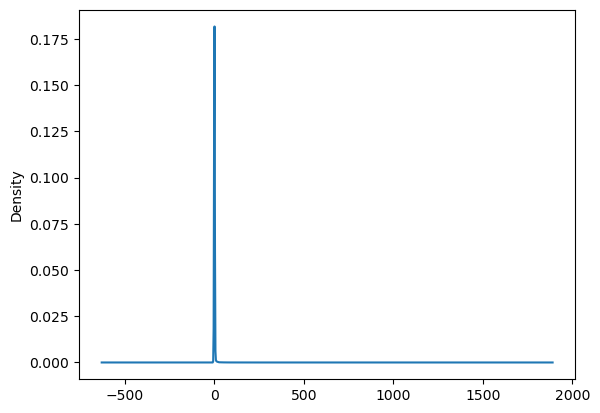

In [36]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
name_counts.plot.density()
plt.show()

In [37]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_name = list(name_counts[name_counts < 100].index)

# Replace in dataframe
for app in replace_name:
    application_df.NAME = application_df.NAME.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                                 25987
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [38]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
at_counts = application_df["APPLICATION_TYPE"].value_counts()
at_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

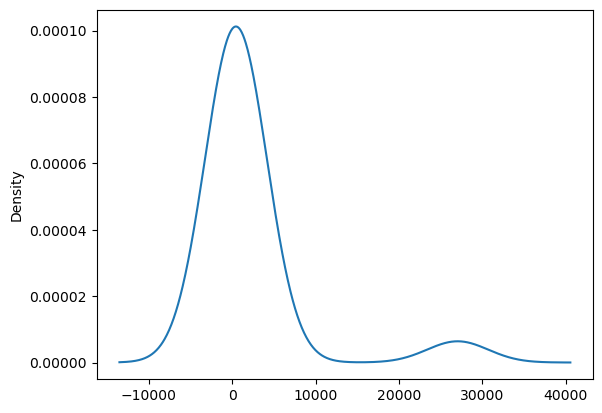

In [39]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
at_counts.plot.density()
plt.show()

In [40]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_at = list(at_counts[at_counts < 1000].index)

# Replace in dataframe
for app in replace_at:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [41]:
# at = pd.DataFrame(application_df[["APPLICATION_TYPE", "IS_SUCCESSFUL"]].value_counts(), columns=['Count']).reset_index()
# at = at.pivot(index="APPLICATION_TYPE", columns=["IS_SUCCESSFUL"], values=["Count"])["Count"].reset_index()
# at["prob"] = at[1]/(at[0]+at[1])
# at = at.set_index("APPLICATION_TYPE")
# at = dict(at["prob"])
# at

In [42]:
# application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].apply(lambda x: at[x])
# application_df

In [43]:
af_counts = application_df["AFFILIATION"].value_counts()
af_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

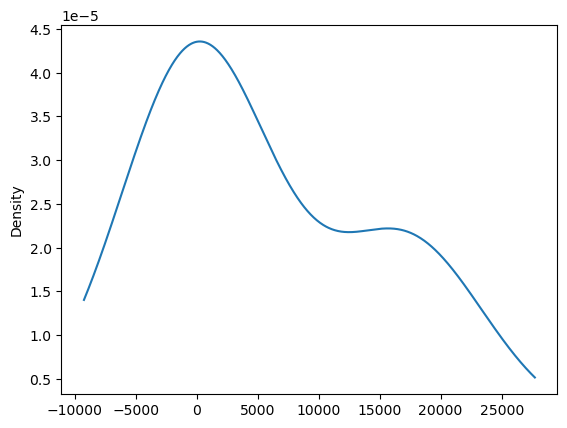

In [44]:
af_counts.plot.density()
plt.show()

In [45]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_af = list(af_counts[af_counts < 5000].index)

# Replace in dataframe
for app in replace_af:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(app,"Independent")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18594
CompanySponsored    15705
Name: AFFILIATION, dtype: int64

In [46]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification_counts = application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

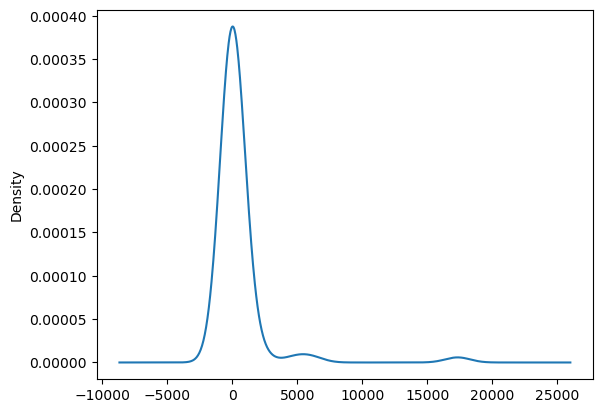

In [47]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
classification_counts.plot.density()
plt.show()

In [48]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_classification = list(classification_counts[classification_counts < 100].index)

# Replace in dataframe
for cls in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [49]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE

cv_list = []
for c in application_df.columns:
    if isinstance(application_df[c][0], str):
        cv_list.append(c)
cv_list

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [50]:
organization_counts = application_df["ORGANIZATION"].value_counts()
organization_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [51]:
replace_organization = list(organization_counts[organization_counts < 10000].index)

# Replace in dataframe
for cls in replace_organization:
    application_df.ORGANIZATION = application_df.ORGANIZATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.ORGANIZATION.value_counts()

Trust          23515
Association    10255
Other            529
Name: ORGANIZATION, dtype: int64

In [52]:
uc_counts = application_df["USE_CASE"].value_counts()
uc_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [53]:
replace_uc = list(uc_counts[uc_counts < 5000].index)

# Replace in dataframe
for cls in replace_uc:
    application_df.USE_CASE = application_df.USE_CASE.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.USE_CASE.value_counts()

Preservation    28095
ProductDev       5671
Other             533
Name: USE_CASE, dtype: int64

In [54]:
status_counts = application_df["STATUS"].value_counts()
status_counts

1    34294
0        5
Name: STATUS, dtype: int64

In [55]:
sc_counts = application_df["SPECIAL_CONSIDERATIONS"].value_counts()
sc_counts

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [56]:
application_df.drop(columns=["STATUS", "SPECIAL_CONSIDERATIONS"], inplace=True)
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,Other,Independent,C1000,ProductDev,Association,0,5000,1
1,Other,T3,Independent,C2000,Preservation,Other,1-9999,108590,1
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,Other,T3,Independent,C1000,Other,Trust,100000-499999,142590,1
...,...,...,...,...,...,...,...,...,...
34294,Other,T4,Independent,C1000,ProductDev,Association,0,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0,5000,0
34296,Other,T3,CompanySponsored,C2000,Preservation,Association,0,5000,0
34297,Other,T5,Independent,C3000,ProductDev,Association,0,5000,1


In [57]:
income_counts = application_df["INCOME_AMT"].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [58]:
# convert_dict = {
#     "0": "NO",
#     "1-9999": "SMALL",
#     "10000-24999": "SMALL",
#     "25000-99999": "SMALL",
#     "100000-499999": "SMALL",
#     "1M-5M": "HIGH",
#     "5M-10M": "HIGH",
#     "10M-50M": "HIGH",
#     "50M+": "HIGH",
# }

convert_dict = {
    "0": 0,
    "1-9999": 1,
    "10000-24999": 2,
    "25000-99999": 3,
    "100000-499999": 4,
    "1M-5M": 5,
    "5M-10M": 6,
    "10M-50M": 7,
    "50M+": 8,
}

application_df["INCOME_AMT"] = application_df["INCOME_AMT"].apply(lambda x: convert_dict[x])
# application_df["INCOME_AMT"] = application_df["INCOME_AMT"].apply(lambda x: np.log(x))
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,Other,Independent,C1000,ProductDev,Association,0,5000,1
1,Other,T3,Independent,C2000,Preservation,Other,1,108590,1
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,2,6692,1
4,Other,T3,Independent,C1000,Other,Trust,4,142590,1
...,...,...,...,...,...,...,...,...,...
34294,Other,T4,Independent,C1000,ProductDev,Association,0,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0,5000,0
34296,Other,T3,CompanySponsored,C2000,Preservation,Association,0,5000,0
34297,Other,T5,Independent,C3000,ProductDev,Association,0,5000,1


In [59]:
# application_df["ASK_AMT"] = application_df["ASK_AMT"].apply(lambda x: 1 if x >50000 else 0)
application_df["ASK_AMT"] = application_df["ASK_AMT"].apply(lambda x: np.log(x))

In [60]:
# application_df.drop(columns=["ASK_AMT"], inplace=True)

In [61]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE

cv_list = []
for c in application_df.columns:
    if isinstance(application_df[c][0], str):
        cv_list.append(c)
cv_list

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION']

In [62]:
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,Other,Independent,C1000,ProductDev,Association,0,8.517193,1
1,Other,T3,Independent,C2000,Preservation,Other,1,11.595335,1
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0,8.517193,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,2,8.808668,1
4,Other,T3,Independent,C1000,Other,Trust,4,11.867729,1
...,...,...,...,...,...,...,...,...,...
34294,Other,T4,Independent,C1000,ProductDev,Association,0,8.517193,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0,8.517193,0
34296,Other,T3,CompanySponsored,C2000,Preservation,Association,0,8.517193,0
34297,Other,T5,Independent,C3000,ProductDev,Association,0,8.517193,1


In [63]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[cv_list]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cv_list)
encode_df.head()

,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_HONOR SOCIETY OF PHI KAPPA PHI,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION,...,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [64]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(labels=cv_list,axis=1)
application_df

,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,...,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust
0,0,8.517193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,11.595335,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,8.517193,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,2,8.808668,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,11.867729,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,8.517193,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
34295,0,8.517193,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
34296,0,8.517193,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
34297,0,8.517193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [65]:
application_df

,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,...,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust
0,0,8.517193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,11.595335,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,8.517193,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,2,8.808668,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,11.867729,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,8.517193,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
34295,0,8.517193,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
34296,0,8.517193,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
34297,0,8.517193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [66]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(labels=["IS_SUCCESSFUL"],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [67]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [68]:
# X_train_scaled = X_train
# X_test_scaled = X_test

In [69]:
hg = pd.read_excel("hyper_grid.xlsx")
hg

,hnl1,hnl2,hnl3,a1,a2,a3,epoch
0,120,60,30,relu,relu,tanh,20
1,120,60,30,tanh,tanh,relu,20
2,60,30,10,relu,relu,tanh,20
3,60,30,10,tanh,tanh,relu,20


### Deliverable 2: Compile, Train and Evaluate the Model

In [70]:
# Import checkpoint dependencies
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# max_id = -1
# max_acc = 0
# flag = -1
    
# for row in hg.itertuples():
#     print(max_id, max_acc, row)
#     # Define the model - deep neural net
#     number_input_features = len(X_train[0])
    
#     hidden_nodes_layer1 =  int(row[1])
#     hidden_nodes_layer2 = int(row[2])
#     hidden_nodes_layer3 = int(row[3])

#     nn = tf.keras.models.Sequential()

#     print(row[4])
#     # First hidden layer
#     nn.add(
#         tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=row[4])
#     )

#     # Second hidden layer
#     nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=row[5]))

#     # Third hidden layer
#     nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=row[6]))

#     # Output layer
#     nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#     # Check the structure of the model
#     nn.summary()
    
#     # Compile the model
#     nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    
#     # Compile the model
#     nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#     # Create a callback that saves the model's weights every 5 epochs
#     # Train the model
#     fit_model = nn.fit(X_train_scaled,y_train,epochs=row[7])

#     # Evaluate the model using the test data
#     model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=0)
#     print(f"{row[0]} Loss: {model_loss}, Accuracy: {model_accuracy}")
    
#     if model_accuracy > max_acc:
#         max_acc = model_accuracy
#         max_id = row[0]      
    
#     # Export our model to HDF5 file
#     nn.save(f"AlphabetSoupCharityOptmized_{row[0]}.h5")

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Create the SVM model
svm = SVC(kernel='linear')

In [72]:
# Train the model
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [73]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.733


In [74]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.738


In [75]:
from sklearn.linear_model import LogisticRegression
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train_scaled,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test_scaled)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.737


In [76]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  60
hidden_nodes_layer2 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                3600      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1220      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 4,841
Trainable params: 4,841
Non-trainable params: 0
_________________________________________________________________


In [77]:
# # Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weightsOptFinal.{epoch:02d}.hdf5"

In [78]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=30,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/30
  1/804 [..............................] - ETA: 6:55 - loss: 0.7595 - accuracy: 0.4062
Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.7139 - accuracy: 0.5006  
Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5
 44/804 [>.............................] - ETA: 1s - loss: 0.6792 - accuracy: 0.5668
Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 

478/804 [================>.............] - ETA: 0s - loss: 0.5611 - accuracy: 0.7013
Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5595 - accuracy: 0.7026
Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.5580 - accuracy: 0.7040
Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving model to checkpoints\weightsOptFinal.01.hdf5

Epoch 00001: saving m

151/804 [====>.........................] - ETA: 1s - loss: 0.4865 - accuracy: 0.7588
Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5
167/804 [=====>........................] - ETA: 1s - loss: 0.4867 - accuracy: 0.7586
Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 0.4871 - accuracy: 0.7581
Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving m


Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.4903 - accuracy: 0.7556
Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.4904 - accuracy: 0.7556
Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.4905 - accuracy: 0.7557
Epoch 00002: saving model to checkpoints\weightsOptFinal.02.hdf5

Epoch 00002: saving m


Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.4862 - accuracy: 0.7607
Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5

Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5

Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5

Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.4862 - accuracy: 0.7605
Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5

Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5

Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5

Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.4862 - accuracy: 0.7603
Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5

Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5

Epoch 00003: saving m

773/804 [===========================>..] - ETA: 0s - loss: 0.4877 - accuracy: 0.7571
Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5

Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5

Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5

Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.4878 - accuracy: 0.7571
Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5

Epoch 00003: saving model to checkpoints\weightsOptFinal.03.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4878 - accuracy: 0.7570
Epoch 4/30
  1/804 [..............................] - ETA: 0s - loss: 0.4900 - accuracy: 0.7500
Epoch 00004: saving model to checkpoints\weightsOptFinal.04.hdf5

Epoch 00004: saving model to checkpoints\weightsOptFinal.04.hdf5

Epoch 00004: saving model to checkpoints\weightsOptFinal.04.hdf5

Epoch 00004: saving model to checkpoints\weightsOptFi


Epoch 00004: saving model to checkpoints\weightsOptFinal.04.hdf5
444/804 [===============>..............] - ETA: 0s - loss: 0.4887 - accuracy: 0.7546
Epoch 00004: saving model to checkpoints\weightsOptFinal.04.hdf5

Epoch 00004: saving model to checkpoints\weightsOptFinal.04.hdf5

Epoch 00004: saving model to checkpoints\weightsOptFinal.04.hdf5

Epoch 00004: saving model to checkpoints\weightsOptFinal.04.hdf5
466/804 [================>.............] - ETA: 0s - loss: 0.4886 - accuracy: 0.7548
Epoch 00004: saving model to checkpoints\weightsOptFinal.04.hdf5

Epoch 00004: saving model to checkpoints\weightsOptFinal.04.hdf5

Epoch 00004: saving model to checkpoints\weightsOptFinal.04.hdf5

Epoch 00004: saving model to checkpoints\weightsOptFinal.04.hdf5

Epoch 00004: saving model to checkpoints\weightsOptFinal.04.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.4885 - accuracy: 0.7551
Epoch 00004: saving model to checkpoints\weightsOptFinal.04.hdf5

Epoch 00004: saving m

106/804 [==>...........................] - ETA: 1s - loss: 0.4863 - accuracy: 0.7636
Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5
127/804 [===>..........................] - ETA: 1s - loss: 0.4876 - accuracy: 0.7623
Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 0.4884 - accuracy: 0.7613
Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving m


Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.4885 - accuracy: 0.7584
Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.4885 - accuracy: 0.7583
Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5

Epoch 00005: saving model to checkpoints\weightsOptFinal.05.hdf5
635/804 [======================>.......]


Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.4810 - accuracy: 0.7638
Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.4811 - accuracy: 0.7635
Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.4813 - accuracy: 0.7632
Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving m

711/804 [=========================>....] - ETA: 0s - loss: 0.4830 - accuracy: 0.7610
Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.4831 - accuracy: 0.7609
Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.4832 - accuracy: 0.7609
Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving model to checkpoints\weightsOptFinal.06.hdf5

Epoch 00006: saving m


Epoch 00007: saving model to checkpoints\weightsOptFinal.07.hdf5

Epoch 00007: saving model to checkpoints\weightsOptFinal.07.hdf5
397/804 [=============>................] - ETA: 0s - loss: 0.4892 - accuracy: 0.7537
Epoch 00007: saving model to checkpoints\weightsOptFinal.07.hdf5

Epoch 00007: saving model to checkpoints\weightsOptFinal.07.hdf5

Epoch 00007: saving model to checkpoints\weightsOptFinal.07.hdf5

Epoch 00007: saving model to checkpoints\weightsOptFinal.07.hdf5

Epoch 00007: saving model to checkpoints\weightsOptFinal.07.hdf5
422/804 [==============>...............] - ETA: 0s - loss: 0.4890 - accuracy: 0.7539
Epoch 00007: saving model to checkpoints\weightsOptFinal.07.hdf5

Epoch 00007: saving model to checkpoints\weightsOptFinal.07.hdf5

Epoch 00007: saving model to checkpoints\weightsOptFinal.07.hdf5

Epoch 00007: saving model to checkpoints\weightsOptFinal.07.hdf5
446/804 [===============>..............] - ETA: 0s - loss: 0.4889 - accuracy: 0.7540
Epoch 00007: saving m

 69/804 [=>............................] - ETA: 1s - loss: 0.4791 - accuracy: 0.7587
Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5
 89/804 [==>...........................] - ETA: 1s - loss: 0.4784 - accuracy: 0.7608
Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5
108/804 [===>..........................] - ETA: 1s - loss: 0.4777 - accuracy: 0.7627
Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving m

556/804 [===================>..........] - ETA: 0s - loss: 0.4792 - accuracy: 0.7644
Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.4794 - accuracy: 0.7643
Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.4796 - accuracy: 0.7642
Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving model to checkpoints\weightsOptFinal.08.hdf5

Epoch 00008: saving m


Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5
228/804 [=======>......................] - ETA: 1s - loss: 0.4866 - accuracy: 0.7610
Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 0.4865 - accuracy: 0.7611
Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 0.4864 - accuracy: 0.7611
Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving m


Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.4864 - accuracy: 0.7606
Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.4863 - accuracy: 0.7605
Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5

Epoch 00009: saving model to checkpoints\weightsOptFinal.09.hdf5
764/804 [===========================>..]

370/804 [============>.................] - ETA: 1s - loss: 0.4787 - accuracy: 0.7677
Epoch 00010: saving model to checkpoints\weightsOptFinal.10.hdf5

Epoch 00010: saving model to checkpoints\weightsOptFinal.10.hdf5

Epoch 00010: saving model to checkpoints\weightsOptFinal.10.hdf5

Epoch 00010: saving model to checkpoints\weightsOptFinal.10.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.4789 - accuracy: 0.7676
Epoch 00010: saving model to checkpoints\weightsOptFinal.10.hdf5

Epoch 00010: saving model to checkpoints\weightsOptFinal.10.hdf5

Epoch 00010: saving model to checkpoints\weightsOptFinal.10.hdf5

Epoch 00010: saving model to checkpoints\weightsOptFinal.10.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.4790 - accuracy: 0.7674
Epoch 00010: saving model to checkpoints\weightsOptFinal.10.hdf5

Epoch 00010: saving model to checkpoints\weightsOptFinal.10.hdf5

Epoch 00010: saving model to checkpoints\weightsOptFinal.10.hdf5

Epoch 00010: saving m


Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5
 42/804 [>.............................] - ETA: 1s - loss: 0.4650 - accuracy: 0.7743
Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5
 64/804 [=>............................] - ETA: 1s - loss: 0.4600 - accuracy: 0.7761
Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 0.4594 - accuracy: 0.7758
Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving m


Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5
516/804 [==================>...........] - ETA: 0s - loss: 0.4794 - accuracy: 0.7639
Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 0.4796 - accuracy: 0.7637
Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.4798 - accuracy: 0.7635
Epoch 00011: saving model to checkpoints\weightsOptFinal.11.hdf5

Epoch 00011: saving m

172/804 [=====>........................] - ETA: 1s - loss: 0.4884 - accuracy: 0.7567
Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 0.4879 - accuracy: 0.7569
Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.4880 - accuracy: 0.7569
Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving m


Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.4850 - accuracy: 0.7597
Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.4848 - accuracy: 0.7597
Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.4847 - accuracy: 0.7598
Epoch 00012: saving model to checkpoints\weightsOptFinal.12.hdf5

Epoch 00012: saving m

320/804 [==========>...................] - ETA: 1s - loss: 0.4808 - accuracy: 0.7699
Epoch 00013: saving model to checkpoints\weightsOptFinal.13.hdf5

Epoch 00013: saving model to checkpoints\weightsOptFinal.13.hdf5

Epoch 00013: saving model to checkpoints\weightsOptFinal.13.hdf5

Epoch 00013: saving model to checkpoints\weightsOptFinal.13.hdf5

Epoch 00013: saving model to checkpoints\weightsOptFinal.13.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.4810 - accuracy: 0.7696
Epoch 00013: saving model to checkpoints\weightsOptFinal.13.hdf5

Epoch 00013: saving model to checkpoints\weightsOptFinal.13.hdf5

Epoch 00013: saving model to checkpoints\weightsOptFinal.13.hdf5

Epoch 00013: saving model to checkpoints\weightsOptFinal.13.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.4812 - accuracy: 0.7694
Epoch 00013: saving model to checkpoints\weightsOptFinal.13.hdf5

Epoch 00013: saving model to checkpoints\weightsOptFinal.13.hdf5

Epoch 00013: saving m


Epoch 00013: saving model to checkpoints\weightsOptFinal.13.hdf5

Epoch 00013: saving model to checkpoints\weightsOptFinal.13.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4817 - accuracy: 0.7659
Epoch 14/30
  1/804 [..............................] - ETA: 0s - loss: 0.4899 - accuracy: 0.7812
Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5

Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5

Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5

Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5207 - accuracy: 0.7341
Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5

Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5

Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5

Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.5116 - acc


Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.4831 - accuracy: 0.7579
Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5

Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5

Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5
471/804 [================>.............] - ETA: 0s - loss: 0.4830 - accuracy: 0.7580
Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5

Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5

Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5

Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.4829 - accuracy: 0.7581
Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5

Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5

Epoch 00014: saving model to checkpoints\weightsOptFinal.14.hdf5

Epoch 00014: saving m


Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5
125/804 [===>..........................] - ETA: 1s - loss: 0.4761 - accuracy: 0.7699
Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5
145/804 [====>.........................] - ETA: 1s - loss: 0.4772 - accuracy: 0.7686
Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 0.4779 - accuracy: 0.7678
Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving m


Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.4790 - accuracy: 0.7641
Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.4791 - accuracy: 0.7640
Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.4792 - accuracy: 0.7639
Epoch 00015: saving model to checkpoints\weightsOptFinal.15.hdf5

Epoch 00015: saving m

262/804 [========>.....................] - ETA: 1s - loss: 0.4849 - accuracy: 0.7588
Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.4846 - accuracy: 0.7589
Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.4844 - accuracy: 0.7590
Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving m

736/804 [==========================>...] - ETA: 0s - loss: 0.4816 - accuracy: 0.7604
Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.4816 - accuracy: 0.7605
Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.4815 - accuracy: 0.7605
Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving model to checkpoints\weightsOptFinal.16.hdf5

Epoch 00016: saving m


Epoch 00017: saving model to checkpoints\weightsOptFinal.17.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.4777 - accuracy: 0.7633
Epoch 00017: saving model to checkpoints\weightsOptFinal.17.hdf5

Epoch 00017: saving model to checkpoints\weightsOptFinal.17.hdf5

Epoch 00017: saving model to checkpoints\weightsOptFinal.17.hdf5

Epoch 00017: saving model to checkpoints\weightsOptFinal.17.hdf5
438/804 [===============>..............] - ETA: 0s - loss: 0.4780 - accuracy: 0.7631
Epoch 00017: saving model to checkpoints\weightsOptFinal.17.hdf5

Epoch 00017: saving model to checkpoints\weightsOptFinal.17.hdf5

Epoch 00017: saving model to checkpoints\weightsOptFinal.17.hdf5

Epoch 00017: saving model to checkpoints\weightsOptFinal.17.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.4783 - accuracy: 0.7627
Epoch 00017: saving model to checkpoints\weightsOptFinal.17.hdf5

Epoch 00017: saving model to checkpoints\weightsOptFinal.17.hdf5

Epoch 00017: saving m

 83/804 [==>...........................] - ETA: 1s - loss: 0.4822 - accuracy: 0.7664
Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5
108/804 [===>..........................] - ETA: 1s - loss: 0.4831 - accuracy: 0.7654
Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5
131/804 [===>..........................] - ETA: 1s - loss: 0.4831 - accuracy: 0.7646
Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving m

572/804 [====================>.........] - ETA: 0s - loss: 0.4841 - accuracy: 0.7592
Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.4840 - accuracy: 0.7593
Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.4839 - accuracy: 0.7593
Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving model to checkpoints\weightsOptFinal.18.hdf5

Epoch 00018: saving m


Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.4812 - accuracy: 0.7568
Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.4811 - accuracy: 0.7570
Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 0.4811 - accuracy: 0.7573
Epoch 00019: saving m


Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.4804 - accuracy: 0.7610
Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.4804 - accuracy: 0.7611
Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.4804 - accuracy: 0.7611
Epoch 00019: saving model to checkpoints\weightsOptFinal.19.hdf5

Epoch 00019: saving m

392/804 [=============>................] - ETA: 1s - loss: 0.4788 - accuracy: 0.7644
Epoch 00020: saving model to checkpoints\weightsOptFinal.20.hdf5

Epoch 00020: saving model to checkpoints\weightsOptFinal.20.hdf5

Epoch 00020: saving model to checkpoints\weightsOptFinal.20.hdf5

Epoch 00020: saving model to checkpoints\weightsOptFinal.20.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.4786 - accuracy: 0.7643
Epoch 00020: saving model to checkpoints\weightsOptFinal.20.hdf5

Epoch 00020: saving model to checkpoints\weightsOptFinal.20.hdf5

Epoch 00020: saving model to checkpoints\weightsOptFinal.20.hdf5

Epoch 00020: saving model to checkpoints\weightsOptFinal.20.hdf5
430/804 [===============>..............] - ETA: 0s - loss: 0.4785 - accuracy: 0.7643
Epoch 00020: saving model to checkpoints\weightsOptFinal.20.hdf5

Epoch 00020: saving model to checkpoints\weightsOptFinal.20.hdf5

Epoch 00020: saving model to checkpoints\weightsOptFinal.20.hdf5

Epoch 00020: saving m


Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5
 61/804 [=>............................] - ETA: 1s - loss: 0.4811 - accuracy: 0.7695
Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 0.4803 - accuracy: 0.7706
Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.4789 - accuracy: 0.7709
Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epoch 00021: saving m

534/804 [==================>...........] - ETA: 0s - loss: 0.4762 - accuracy: 0.7682
Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.4762 - accuracy: 0.7681
Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.4763 - accuracy: 0.7680
Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.4763 - accuracy: 0.7679
Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epoch 00021: saving model to checkpoints\weightsOptFinal.21.hdf5

Epo

177/804 [=====>........................] - ETA: 1s - loss: 0.4831 - accuracy: 0.7565
Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.4831 - accuracy: 0.7568
Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.4830 - accuracy: 0.7572
Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving m

642/804 [======================>.......] - ETA: 0s - loss: 0.4810 - accuracy: 0.7616
Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.4810 - accuracy: 0.7616
Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.4809 - accuracy: 0.7616
Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving model to checkpoints\weightsOptFinal.22.hdf5

Epoch 00022: saving m


Epoch 00023: saving model to checkpoints\weightsOptFinal.23.hdf5

Epoch 00023: saving model to checkpoints\weightsOptFinal.23.hdf5

Epoch 00023: saving model to checkpoints\weightsOptFinal.23.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.4955 - accuracy: 0.7497
Epoch 00023: saving model to checkpoints\weightsOptFinal.23.hdf5

Epoch 00023: saving model to checkpoints\weightsOptFinal.23.hdf5

Epoch 00023: saving model to checkpoints\weightsOptFinal.23.hdf5

Epoch 00023: saving model to checkpoints\weightsOptFinal.23.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.4949 - accuracy: 0.7500
Epoch 00023: saving model to checkpoints\weightsOptFinal.23.hdf5

Epoch 00023: saving model to checkpoints\weightsOptFinal.23.hdf5

Epoch 00023: saving model to checkpoints\weightsOptFinal.23.hdf5

Epoch 00023: saving model to checkpoints\weightsOptFinal.23.hdf5

Epoch 00023: saving model to checkpoints\weightsOptFinal.23.hdf5
373/804 [============>.................]

804/804 [==============================] - 2s 2ms/step - loss: 0.4882 - accuracy: 0.7554
Epoch 24/30
  1/804 [..............................] - ETA: 1s - loss: 0.4196 - accuracy: 0.7812
Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5
 24/804 [..............................] - ETA: 1s - loss: 0.4738 - accuracy: 0.7411
Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5
 45/804 [>.............................] - ETA: 1s - loss: 0.4761 - accuracy: 0.7487
Epoch 00024: saving model to checkpoints\weightsOptF

479/804 [================>.............] - ETA: 0s - loss: 0.4772 - accuracy: 0.7617
Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5
504/804 [=================>............] - ETA: 0s - loss: 0.4772 - accuracy: 0.7617
Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.4772 - accuracy: 0.7618
Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving model to checkpoints\weightsOptFinal.24.hdf5

Epoch 00024: saving m

160/804 [====>.........................] - ETA: 1s - loss: 0.4805 - accuracy: 0.7683
Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5
183/804 [=====>........................] - ETA: 1s - loss: 0.4794 - accuracy: 0.7688
Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.4787 - accuracy: 0.7691
Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving m


Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.4749 - accuracy: 0.7684
Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.4750 - accuracy: 0.7682
Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.4751 - accuracy: 0.7681
Epoch 00025: saving model to checkpoints\weightsOptFinal.25.hdf5

Epoch 00025: saving m

311/804 [==========>...................] - ETA: 1s - loss: 0.4701 - accuracy: 0.7704
Epoch 00026: saving model to checkpoints\weightsOptFinal.26.hdf5

Epoch 00026: saving model to checkpoints\weightsOptFinal.26.hdf5

Epoch 00026: saving model to checkpoints\weightsOptFinal.26.hdf5

Epoch 00026: saving model to checkpoints\weightsOptFinal.26.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.4704 - accuracy: 0.7702
Epoch 00026: saving model to checkpoints\weightsOptFinal.26.hdf5

Epoch 00026: saving model to checkpoints\weightsOptFinal.26.hdf5

Epoch 00026: saving model to checkpoints\weightsOptFinal.26.hdf5

Epoch 00026: saving model to checkpoints\weightsOptFinal.26.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.4706 - accuracy: 0.7700
Epoch 00026: saving model to checkpoints\weightsOptFinal.26.hdf5

Epoch 00026: saving model to checkpoints\weightsOptFinal.26.hdf5

Epoch 00026: saving model to checkpoints\weightsOptFinal.26.hdf5

Epoch 00026: saving m

804/804 [==============================] - 2s 2ms/step - loss: 0.4748 - accuracy: 0.7663
Epoch 27/30
  1/804 [..............................] - ETA: 0s - loss: 0.5095 - accuracy: 0.6875
Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.4816 - accuracy: 0.7371
Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.4756 - accuracy: 0.7495
Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptF

477/804 [================>.............] - ETA: 0s - loss: 0.4779 - accuracy: 0.7602
Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5
502/804 [=================>............] - ETA: 0s - loss: 0.4779 - accuracy: 0.7603
Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.4781 - accuracy: 0.7603
Epoch 00027: saving model to checkpoints\weightsOptFinal.27.hdf5

Epoch 00027: saving m


Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.4625 - accuracy: 0.7797
Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 0.4630 - accuracy: 0.7789
Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.4633 - accuracy: 0.7784
Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving m

628/804 [======================>.......] - ETA: 0s - loss: 0.4719 - accuracy: 0.7693
Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.4721 - accuracy: 0.7691
Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.4723 - accuracy: 0.7689
Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving model to checkpoints\weightsOptFinal.28.hdf5

Epoch 00028: saving m


Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5

Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.4835 - accuracy: 0.7568
Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5

Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5

Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5

Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.4831 - accuracy: 0.7572
Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5

Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5

Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5

Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5

Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.4829 - accuracy: 0.7575
Epoch 00029: saving m

774/804 [===========================>..] - ETA: 0s - loss: 0.4797 - accuracy: 0.7608
Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5

Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5

Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5

Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.4797 - accuracy: 0.7609
Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5

Epoch 00029: saving model to checkpoints\weightsOptFinal.29.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4797 - accuracy: 0.7609
Epoch 30/30
  1/804 [..............................] - ETA: 0s - loss: 0.5330 - accuracy: 0.7812
Epoch 00030: saving model to checkpoints\weightsOptFinal.30.hdf5

Epoch 00030: saving model to checkpoints\weightsOptFinal.30.hdf5

Epoch 00030: saving model to checkpoints\weightsOptFinal.30.hdf5
 15/804 [..............................] - ETA: 2s - 

430/804 [===============>..............] - ETA: 1s - loss: 0.4819 - accuracy: 0.7615
Epoch 00030: saving model to checkpoints\weightsOptFinal.30.hdf5

Epoch 00030: saving model to checkpoints\weightsOptFinal.30.hdf5

Epoch 00030: saving model to checkpoints\weightsOptFinal.30.hdf5

Epoch 00030: saving model to checkpoints\weightsOptFinal.30.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 0.4818 - accuracy: 0.7614
Epoch 00030: saving model to checkpoints\weightsOptFinal.30.hdf5

Epoch 00030: saving model to checkpoints\weightsOptFinal.30.hdf5

Epoch 00030: saving model to checkpoints\weightsOptFinal.30.hdf5

Epoch 00030: saving model to checkpoints\weightsOptFinal.30.hdf5

Epoch 00030: saving model to checkpoints\weightsOptFinal.30.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.4817 - accuracy: 0.7613
Epoch 00030: saving model to checkpoints\weightsOptFinal.30.hdf5

Epoch 00030: saving model to checkpoints\weightsOptFinal.30.hdf5

Epoch 00030: saving m

In [80]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharityOptmizedFinal.h5")